# Bike-sharing analysis

### Column information

| --- | --- |
| Column | Description |
| instant | record index |
| dteday | date |
| season | season (1:winter, 2:spring, 3:summer, 4:fall) |
| yr | year (0: 2011, 1: 2012) |
| mnth | month ( 1 to 12) |
| hr | hour (0 to 23) |
| holiday |  weather day is holiday or not (extracted from [Web Link](https://dchr.dc.gov/page/holiday-schedules)) |
| weekday | day of the week |
| workingday | if day is neither weekend nor holiday is 1, otherwise is 0. |
| weathersit | 1: Clear, Few clouds, Partly cloudy, Partly cloudy; 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist; 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds; 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog|
| temp | Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale) |
| atemp | Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale) |
| hum | Normalized humidity. The values are divided to 100 (max) |
| windspeed | Normalized wind speed. The values are divided to 67 (max) |
| casual | count of casual users |
| registered | registered |
| cnt | count of total rental bikes including both casual and registered |


In [17]:
from datetime import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

sns.set()
plt.rcParams['figure.figsize'] = (17, 5)

In [2]:
days = pd.read_csv('data/day.csv', index_col=0, parse_dates=['dteday'])
hour = pd.read_csv('data/hour.csv', index_col=0, parse_dates=['dteday'])

In [6]:
days

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341


In [7]:
hour

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90


### Exploratory Data Analysis

Both datasets have redundant values that need to be taken care of, for instance, `days.csv` has the datetime value as well as season, year, and month. The other, `hour.csv` has the same values as in `days.csv` and hr column. Therefore, the following feature engineering techniques are going to happen:
- `days.csv`: drop redundant values
- `hour.csv`: combine hourly values and drop the redundant columns


In [8]:
# days.csv dataset
days.head(3)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


In [9]:
days_cleaned = days.drop(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday'], axis='columns')
days_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 1 to 731
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   weathersit  731 non-null    int64         
 2   temp        731 non-null    float64       
 3   atemp       731 non-null    float64       
 4   hum         731 non-null    float64       
 5   windspeed   731 non-null    float64       
 6   casual      731 non-null    int64         
 7   registered  731 non-null    int64         
 8   cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(4)
memory usage: 57.1 KB


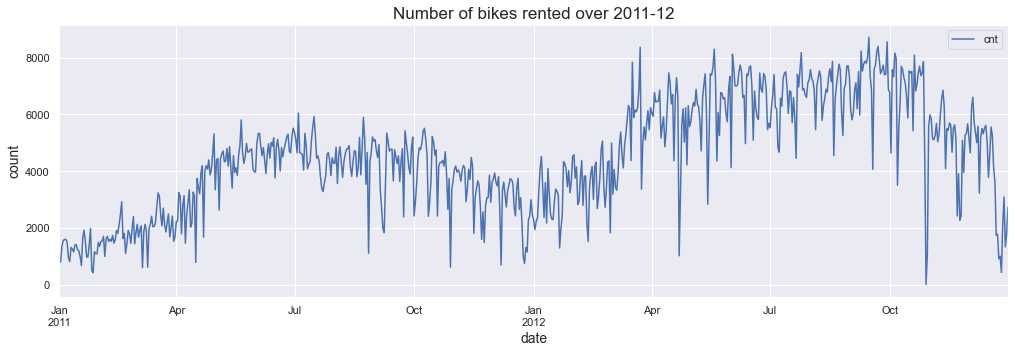

In [14]:
days_cleaned.set_index('dteday')[['cnt']].plot()
plt.title('Number of bikes rented over 2011-12', size=17)
plt.xlabel('date', size=14); plt.ylabel('count', size=14)
plt.show()

In [23]:
# break down 2011 & 2012
threshold = pd.to_datetime('2012-01-01')
days2011 = days[days['dteday'] < threshold]
days2012 = days[days['dteday'] > threshold]

assert days2011.dteday.max() < threshold < days2012.dteday.min(), 'Datetimes were incorrectly split'

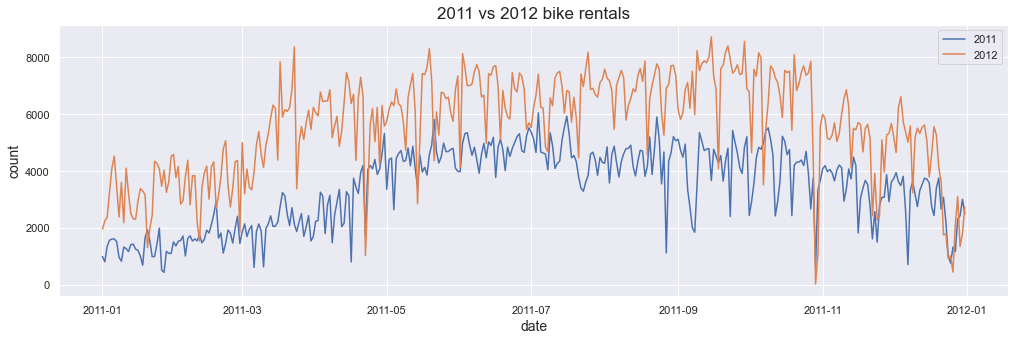

In [45]:
# show kdeplot for both years
# xs = days2011.dteday.dt.month_name()
plt.plot(days2011.dteday, days2011.cnt, label='2011')
plt.plot(days2011.dteday, days2012.cnt, label='2012')

plt.title('2011 vs 2012 bike rentals', size=17)
plt.xlabel('date', size=14); plt.ylabel('count', size=14)
plt.legend(loc='best')
plt.show()

In [33]:
months = days2011.dteday.dt.month

instant
1       January
2       January
3       January
4       January
5       January
         ...   
361    December
362    December
363    December
364    December
365    December
Name: dteday, Length: 365, dtype: object